## Problem 1

Consider the ODE 

$$u'(t) = \lambda (u − \cos t) − \sin t, \quad u(0) = u_0,$$

with the exact solution

$$u(t) = e^{\lambda t}(u_0 − 1) + \cos t.$$

Solve the equation and compare with the exact solution using 

a) The trapezoidal method

b) The backward Euler method

for $0\le t \le 3$. Use the parameter $\lambda=-10^6,u_0=1.5,\Delta t = 0.1$. 

Why trapezoidal rule seems to be less accurate? Repeat with $\Delta t=0.001$. Explain the difference in terms of the behavior $R(z)$ at $z=\infty$.

**(1)**
Solve and compare with exact solution using $\Delta t = 0.1, 0.001$

**(a)**
For the trapezoidal rule, we have:
\begin{equation}
    u_{n+1} = u_n + \frac{h}{2} (f(u(t_{n+1})) + f(u(t_n))) \\
    u_{n+1} = u_n + \frac{h}{2} (\lambda (u_{n+1} - \cos(t_{n+1}) - \sin(t_{n+1}) + 
                                (\lambda (u_{n} - \cos(t_n)) - \sin(t_n) ))) \\
   (1-\frac{1}{2}h\lambda)u_{n+1} = (1+\frac{1}{2}h\lambda)u_n - (\frac{h\lambda}{2}(\cos(t_{n+1}) + \cos(t_n)) + \frac{h}{2}(\sin(t_{n+1}) + \sin(t_n))) \\
   u_{n+1} = (1-\frac{1}{2}h\lambda)^{-1}(1+\frac{1}{2}h\lambda)u_n - (1-\frac{1}{2}h\lambda)^{-1} (\frac{h\lambda}{2}(\cos(t_{n+1}) + \cos(t_n)) + \frac{h}{2}(\sin(t_{n+1}) + \sin(t_n)))
\end{equation}

**(b)**
For the Backward Euler Method, we have for each timestep:
\begin{equation}
    u_{n+1} = u_n + h\lambda (u_{n+1} - \cos(t_{n+1})) - \sin(t_{n+1})
\end{equation}

\begin{equation}
    u_{n+1} = \frac{1}{1-h\lambda}(u_n - h\lambda \cos(t_{n+1}) - \sin(t_{n+1}))
\end{equation}

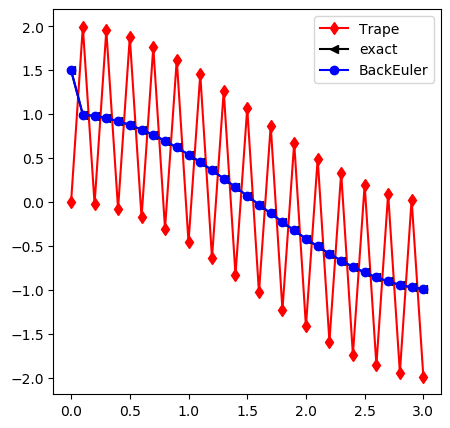

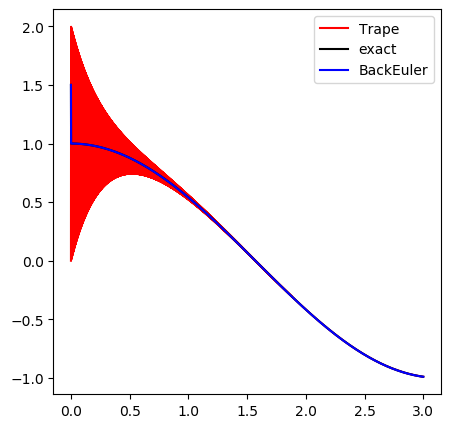

PyObject <matplotlib.legend.Legend object at 0x14c89f630>

In [123]:
function BackEuler(N,T,u0,lambda)
    h = T/N
    time = collect(0:h:T)
    u = zeros(length(time));
    u[1] = u0
    for i in 1:length(time)-1
        u[i+1] = (1/(1-h*lambda)) * (u[i] - h*lambda*cos(time[i+1]) - sin(time[i+1]))
    end
    return u
end

function Trape(N,T,u0,lambda)
    h = T/N
    time = collect(0:h:T)
    u = zeros(length(time)); z = h * lambda;
    c1 = (1 + z/2) / (1 - z/2);
    c2 = -(z/2) / (1 - z/2);
    c3 = -(h/2) / (1 - z/2);
    
    for i in 1:length(time)-1
        u[i+1] = c1 * u[i] + c2 * (cos(time[i+1]) + cos(time[i])) + c3 * (sin(time[i+1]) + sin(time[i]))
    end
    return u
end


u0 = 1.5
lambda = -1.0e+6
T = 3.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
uexact = exp.(lambda*t)*(u0-1)+cos.(t)
uBackEuler = BackEuler(N,T,u0,lambda)
uTrape     = Trape(N,T,u0,lambda)

using PyPlot
figure(1,figsize=(5,5))
plot(t,uTrape,"r-d",label="Trape")
plot(t,uexact,"k-<",label="exact")
plot(t,uBackEuler,"b-o",label="BackEuler")
legend()

dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
uexact = exp.(lambda*t)*(u0-1)+cos.(t)
uBackEuler = BackEuler(N,T,u0,lambda)
uTrape     = Trape(N,T,u0,lambda)
figure(2,figsize=(5,5))
plot(t,uTrape,"r-",label="Trape")
plot(t,uexact,"k-",label="exact")
plot(t,uBackEuler,"b-",label="BackEuler")
legend()

**(2)**
Why trapezoidal rule is less accurate? Explain the difference of behavior of $R(z)$ at $z = \infty$:

In order to find the $R(z)$, we can look at the schemes on the test equation, with the $\lambda$ on the same magnitude of $10^6$
\begin{equation}
    \dot{u} = \lambda u
\end{equation}

Backward Euler has:
\begin{equation}
    u_{n+1} = \frac{1}{1-z} u_n \\
    = (\frac{1}{1-z})^2 u_{n-1} \\
    = \cdots = (\frac{1}{1-z})^{n+1} u_0
\end{equation}

Whereas Trapezoidal rule yields:
\begin{align*}
    u_{n+1} = \frac{1+\frac{1}{2}z}{1-\frac{1}{2}z} u_n \\
    = (\frac{1+\frac{1}{2}z}{1-\frac{1}{2}z})^{n+1} u_0
\end{align*}

We have respectively that $|R_{bEuler}(z)| \rightarrow 0$ and $|R_{trap}(z)| \rightarrow 1$, as $z\rightarrow\infty$.

The "stiffness" of the equation causes a stability issue when we have a very large $h\lambda$ and small $h$. Namely, due to the oscilitory behavior of the exact solution (the $\cos(t)$ term), any initial transient term (in this case $e^{\lambda t}(1.5-1) = \frac{1}{2}e^{\lambda t}$) towards $\cos(t)$ will not be eliminated quickly by the trapezoidal rule. Instead, since in our case $|z| = |h\lambda| = |-0.1 \bullet 10^6| = 10^5$, $|R(z)|$ yields $|R(z)|\approx1.0000400008$. Therefore we will observe that the initial transient term oscillates fully with $\cos(t)$ as well, and exhibit large deviation from the true solution.

## Problem 2

Use the following counter example to show that the trapezoidal rule is NOT B-stable.

Consider $\dot{u}=f(u)$ and 

$$f(u) = \begin{cases}
-u, & u \ge 0,\\
-u/\varepsilon, & u < 0.
\end{cases}$$

Consider the initial data to be $u_0 = 0, v_0 = -\varepsilon$.   Choose any $\varepsilon<1/5$, and $h=1$, and show that 

$$|u_1-v_1| > |u_0-v_0|$$



We prove via direct computation, consider trapezoidal rule:
\begin{equation}
    u_1 = u_0 + \frac{h}{2}(f(u_1) + f(u_0)) \\
    v_1 = v_0 + \frac{h}{2}(f(v_1) + f(v_0)
\end{equation}

To compute $u_1$, let us consider the case where $u_1 < 0$:
\begin{equation}
    u_1 = 0 + \frac{1}{2}(-\frac{u_1}{\epsilon} - 0) \\
    u_1 = -\frac{1}{2\epsilon}u_1 \\
    u_1 = 0
\end{equation} but this is a contradiction to our assummption that $u_1 < 0$. 
Therefore, it is necessary that $u_1 = 0$ (via the first assumption $u_1 \ge 0$).

Now we consider $v_1$. As a counterexample, we need only find one $\epsilon < \frac{1}{5}$ such that it satisfies:
\begin{equation}
    |u_1 - v_1| > |u_0 - v_0|
\end{equation}.

Let $\epsilon = \frac{1}{1000}$ for instance. We have $v_0 = -\frac{1}{1000} < 0$. Then we can consider:
$$
    v_1 = v_0 + \frac{1}{2}(f(v_1) + f(v_0)) \\
        = -\frac{1}{1000} + \frac{1}{2}(f(v_1) + (-\frac{-\frac{1}{1000}}{\frac{1}{1000}}   )      ) \\
        = -\frac{1}{1000} + \frac{1}{2}f(v_1) + \frac{1}{2} \\
        = \frac{1}{2}f(v_1) + \frac{499}{1000}
$$. We consider the two cases:
(1) $v_1 \ge 0$, we have:
$$
    v_1 = \frac{1}{2}(-v_1) + \frac{499}{1000} \\
    \frac{3}{2}v_1 = \frac{499}{1000} \\
    v_1 = \frac{499}{1500} > 0
$$

(2) $v_1 < 0$, we have:
$$
    v_1 = \frac{1}{2}(-\frac{v_1}{\frac{1}{1000}}) + \frac{499}{1000} \\
    501v_1 = \frac{499}{1000} \\
    v_1 = \frac{499}{1000 \cdot 501} > 0
$$, which is contradictory; then we must have $v_1 = \frac{499}{1500}$ in our case.

Let's consider our inequality directly:
$$
    |u_1 - v_1| = |0 - \frac{499}{1500}| = \frac{499}{1500} \approx \frac{1}{3} \\
    |u_0 - v_0| = |0 + \frac{1}{1000}| = \frac{1}{1000}
$$. Obviously we derived: $\frac{1}{3} > \frac{1}{1000}$, this means exactly for our particular choice of $\epsilon$. We have clearly that:
\begin{equation}
    |u_1 - v_1| > |u_0 - v_0|
\end{equation}

## Problem 3

Prove that the 1-step Gauss-Legendre method is B-stable.

**Hint**: You can try to show that

$$
\Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2\le 0.
$$


To consider B-stable, we need to consider the contractive mapping $f$ that has the property:
\begin{equation}
    \mathbf{Re}(<x-y, f(x,t)-f(y,t)>) = \mathbf{Re}(<f(x,t)-f(y,t), x-y>) \le 0
\end{equation}.

Then we can consider the Gauss-Legendre 1 scheme
\begin{equation}
    k = f(u_n + \frac{1}{2}hk) \\
    u_{n+1} = u_n + hk
\end{equation}. By means of algebraic manipulation, we can have:
\begin{equation}
    k = \frac{1}{h} (u_{n+1} - u_n)
\end{equation}. We can plug the $k$ back into our first stage:
\begin{equation}
     (u_{n+1} - u_n) = hf(u_n + \frac{1}{2} (u_{n+1} - u_n) ) = hf(\frac{1}{2}u_n + \frac{1}{2}u_{n+1})
\end{equation}, similarly we can consider this for $v_{n+1}$ as well:
\begin{equation}
     (v_{n+1} - v_n) = hf(v_n + \frac{1}{2} (v_{n+1} - v_n) ) = hf(\frac{1}{2}v_n + \frac{1}{2}v_{n+1})
\end{equation}.

$$
\Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2\le 0.
$$
For inner products, we can consider:
$$
\Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2 =\mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), 
                                                         (u_{n+1} - u_n) - (v_{n+1} - v_n)>
$$

On the second part of the inner product, we can replace $(u_{n+1} - u_n) = hf(\frac{1}{2}u_n + \frac{1}{2}u_{n+1})$, and also $(v_{n+1} - v_n) = hf(\frac{1}{2}v_n + \frac{1}{2}v_{n+1})$.
We now have:
$$
    \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), (u_{n+1} - u_n) - (v_{n+1} - v_n)>
    = \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), hf(\frac{1}{2}u_n + \frac{1}{2}u_{n+1}) 
                                        - hf(\frac{1}{2}v_n + \frac{1}{2}v_{n+1})> \\
    = \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), h ( f(\frac{1}{2}(u_n + u_{n+1})) 
                                        - f(\frac{1}{2}(v_n + v_{n+1})) )> \\
    = h \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), ( f(\frac{1}{2}(u_n + u_{n+1})) 
                                        - f(\frac{1}{2}(v_n + v_{n+1})) )>
$$ due to linearity of inner product.

Recall for our contraction map that: 
$$
    \mathbf{Re}(<f(x,t)-f(y,t), x-y>) \le 0
$$

In our context: let $x = \frac{1}{2}(u_{n+1} + u_n)$, and $y = \frac{1}{2}(v_{n+1} + v_n)$, our $f$ is not dependent on $t$.
$$
    \mathbf{Re}(<f(\frac{1}{2}(u_{n+1} + u_n))-f(\frac{1}{2}(v_{n+1} + v_n)) , 
    \frac{1}{2}(u_{n+1} + u_n) - \frac{1}{2}(v_{n+1} - v_n)>) \le 0
$$

Due to linearity of components:
$$
    \mathbf{Re}(<f(\frac{1}{2}(u_{n+1} + u_n))-f(\frac{1}{2}(v_{n+1} + v_n)) , 
    \frac{1}{2}(u_{n+1} + u_n) - \frac{1}{2}(v_{n+1} - v_n)>) \\
    = \frac{1}{2}\mathbf{Re}(<f(\frac{1}{2}(u_{n+1} + u_n))-f(\frac{1}{2}(v_{n+1} + v_n)) , 
    (u_{n+1} + u_n) - (v_{n+1} - v_n)>) \\
    = \frac{1}{2}\mathbf{Re}(<(u_{n+1} + u_n) - (v_{n+1} - v_n), f(\frac{1}{2}(u_{n+1} + u_n))-f(\frac{1}{2}(v_{n+1} + v_n)) >) \le 0
$$



**Solution**
As shown above, namely by multiplying both sides by $\frac{1}{2}$, we get the property that:
$$
    \mathbf{Re}(<(u_{n+1} + u_n) - (v_{n+1} - v_n), f(\frac{1}{2}(u_{n+1} + u_n))-f(\frac{1}{2}(v_{n+1} + v_n)) >) \le 0
$$

Recall our original inner product:
$$
    \Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2 = \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), 
                                                         (u_{n+1} - u_n) - (v_{n+1} - v_n)> \\
                                                          = h \mathbf{Re} <(u_{n+1} + u_n) - (v_{n+1} + v_n), ( f(\frac{1}{2}(u_n + u_{n+1})) 
                                        - f(\frac{1}{2}(v_n + v_{n+1})) )> \le 0
$$ because $h > 0$ as step size.

Concretely:
$$
    \Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2 \le 0
$$

## Problem 4

Solve the van der Pol equation on the interval $[0,T]$

$$
u''=\frac{1}{\varepsilon}(1-u^2)u'-u.
$$
where $\varepsilon=0.1,u(0)=2,u'(0)=0$,$T=60.0$.

a) Implement a RK4 method named `rk4`. Choose the time step $h = 0.001$. Plot the solution $u(t)$ evaluated from the RK4 method. Save the number $u_{RK4}(T)$ which will be treated as the exact solution later.

**(1)** Explanation:
First we convert the second order ODE into a system of first order ODEs by letting:
\begin{equation}
    \mathbf{u} = \begin{pmatrix}
                 u_1 \\
                 u_2
                 \end{pmatrix} = \begin{pmatrix}
                                     u \\
                                     u'
                                 \end{pmatrix}
\end{equation} we therefore obtain:
\begin{equation}
    \mathbf{\dot{u}} = \begin{pmatrix}
                           u_1' \\
                           u_2'
                       \end{pmatrix} = \begin{pmatrix}
                                     u' \\
                                     u''
                                 \end{pmatrix} = \begin{pmatrix}
                                                     u_2 \\
                                                     \frac{1}{\epsilon}(1-{u_1}^2)u_2 - {u_1}
                                                 \end{pmatrix}
\end{equation}

Our function is not explicitly dependent on $t$, consider the RK-4 method:
\begin{equation}
    k_1 = f(u_n) \\
    k_2 = f(u_n + \frac{1}{2}hk_1) \\
    k_3 = f(u_n + \frac{1}{2}hk_2) \\
    k_4 = f(u_n + h k_3) \\
    u_{n+1} = u_n + \frac{1}{6}h (k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

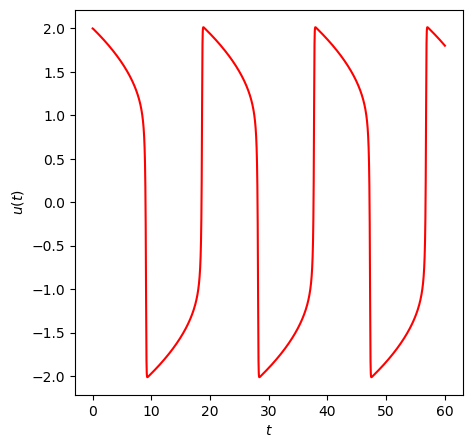

PyObject Text(26.0, 0.5, '$u(t)$')

In [1]:
using LinearAlgebra

#= Helper method representing u' = F(u) =#
function f(ut)
        u1 = ut[1]; u2 = ut[2];
        return [u2, (1/eps) * (1-u1^2)*u2 - u1]
    end

function rk4(N,T,u0,eps)
    h = dt
    u = zeros(2, length(t)); u[:,1] = u0;
    for i in 1:N
        u_n = u[:,i]
        k1 = f(u_n)
        k2 = f(u_n + (1/2)*h*k1)
        k3 = f(u_n + (1/2)*h*k2)
        k4 = f(u_n + h*k3)
        u[:,i+1] = u_n + (1/6)*h*(k1+2*k2+2*k3+k4)
    end
    
    return u
end

using PyPlot

##############################
T = 60.0
dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
u0 = [2.0,0.0]

# RK4
urk4 = rk4(N,T,u0,eps)

figure(1,figsize=(5,5))
plot(t,vec(urk4[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

b) Implement a 2-step Gauss-Legendre method named `gl2fixpoint`. The Butcher tableau for this method is 

    A = [1.0/4.0                       1.0/4.0 - 1.0/6.0*sqrt(3)
         1.0/4.0 + 1.0/6.0*sqrt(3)     1.0/4.0]
    b = [0.5 0.5]

   Choose $h=0.01$. Use fixed point iteration to solve the nonlinear equation. 
   
   The function `gl2fixpoint` should return the solution, as well as the number of iterations for the fixed point iteration for each time step. Plot a figure with x axis being the discrete time step, and y axis being the number of iterations for each time step.

**Explanation (b1)** 
We have the Gauss-Legendre 2 method:
\begin{equation}
    k_1 = f(u_n + h(\frac{1}{4}k_1 + (\frac{1}{4} - \frac{\sqrt{3}}{6}) k_2)) \\
    k_2 = f(u_n + h((\frac{1}{4} + \frac{\sqrt{3}}{6})k_1 + \frac{1}{4}k_2)) \\
    u_{n+1} = h(\frac{1}{2}k_1 + \frac{1}{2}k_2)
\end{equation}

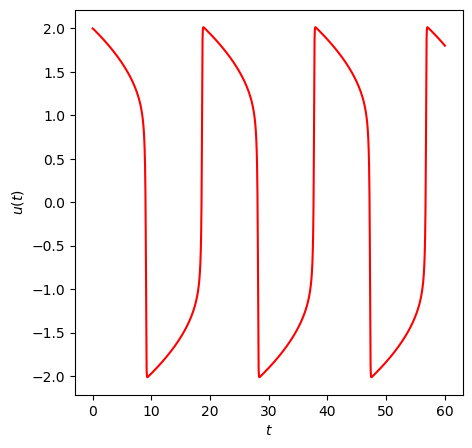

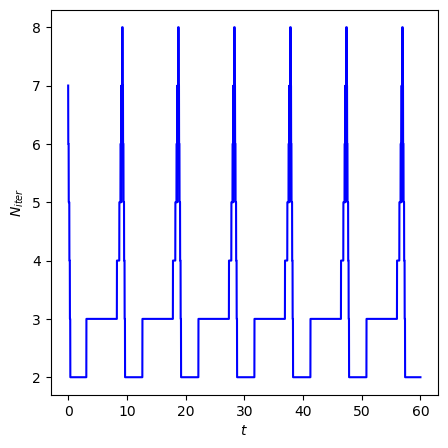

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [2]:
# Gauss-Legendre 2-step. Fixed point formulation

function gl2fixpoint(N,T,u0,eps,maxIter)
    Niter = zeros(length(t)-1) # note Niter has length N-1 versus the solution has length N
    h = T/N
    u = zeros(2, length(t))
    u[:,1] = u0
    a = 1/4; b = ((1/4) - (sqrt(3)/6)); c = ((1/4) + (sqrt(3)/6)); d = a;
    for i in 1:N
        k = [f(u[:,i]);f(u[:,i])]; prev_k = [0;0;0;0]
        u_n = u[:,i]
        while norm(k - prev_k) >= 10^-6
            if Niter[i] >= maxIter
                Niter[i] = maxIter
                break
            else
                prev_k = k;
                k = [f(u_n + h * (a * k[1:2] + b * k[3:4]));
                     f(u_n + h * (c * k[1:2] + d * k[3:4]))]
                Niter[i] += 1
            end
        end
        u[:,i+1] = u_n + h * ( (1/2) * k[1:2] + (1/2) * k[3:4] )
    end
    return u,Niter
end
##############################
T = 60.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step fixed point
ugl2fixpoint,Niter = gl2fixpoint(N,T,u0,eps,500)

figure(1,figsize=(5,5))
plot(t,vec(ugl2fixpoint[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

(b2) Increase $h = 0.1$ and plot again the number of iterations for each time step to reach the same tolerance. 

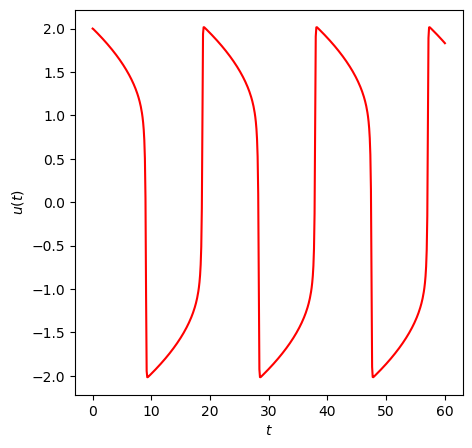

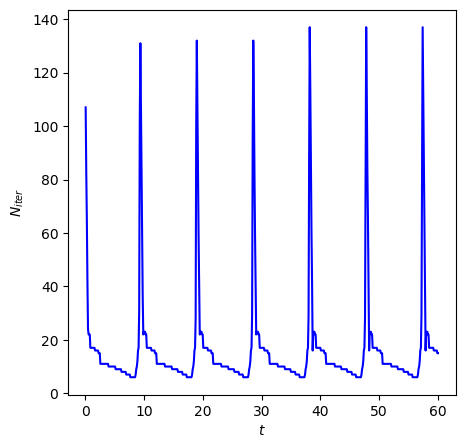

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [3]:
# Increase h to 0.1 and plot again
##############################
T = 60.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step fixed point
ugl2fixpoint,Niter = gl2fixpoint(N,T,u0,eps,500)

figure(1,figsize=(5,5))
plot(t,vec(ugl2fixpoint[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

c) Take $h = T/N$, and $N$ increase from $2^{10}$ to $2^{14}$. Compare the error at the end point $|u_{GL2}(T)-u_{RK4}(T)|$. Demonstrate that the 2-step Gauss-Legendre method is of order 4.

For order $p$ method, we can consider its error to be expressed by:
$E = Ch^p$ with $C$ being a constant.

Then we can consider taking log on both sides, we get:
\begin{equation}
    \log(E) = \log(Ch^p) \\
    = \log(C) + p\log(h)
\end{equation}. Note that this is a function linear in $\log(h)$. Much similar to linear interpolation of a point in $R^2$, we can interpolate $p$ using this linear differencing:
\begin{equation}
    p \approx \frac{\log(E_2) - \log(E_1)}{\log(h_2) - \log(h_1)}
\end{equation}

In [4]:
# Take h = T/N and increase N from 2e10 to 2e14
############################## N = 2e10
############################## compute using GL2 and rk4
T = 60.0
N = 2^10
dt = T/N
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

u_gl2_T, iter = gl2fixpoint(N,T,u0,eps,500)
u_gl2_T_1 = u_gl2_T[:,end]
u_rk4_T = rk4(N,T,u0,eps)
u_rk4_T_1 = u_rk4_T[:,end]

e1 = norm(u_gl2_T_1 - u_rk4_T_1)

############################## N = 2e14
############################## compute using GL2 and rk4
T = 60.0
N = 2^14
dt = T/N
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

u_gl2_T2, iter = gl2fixpoint(N,T,u0,eps,500)
u_gl2_T_2 = u_gl2_T2[:,end]
u_rk4_T2 = rk4(N,T,u0,eps)
u_rk4_T_2 = u_rk4_T2[:,end]

e2 = norm(u_gl2_T_2 - u_rk4_T_2)
estimated_order = round((log(e2) - log(e1)) / (log(60.0 / (2^14) ) - log(60.0 / (2^10)) ))
print("We can see that the order p is estimated to be order: ", estimated_order, " accurate.")

We can see that the order p is estimated to be order: 4.0 accurate.

d) Implement a 2-step Gauss-Legendre method named `gl2Newton`. Solve the nonlinear equation with Newton's method. The stopping criterion for Newton's method is the same as that for the fixed point iteration. The function  should return the solution, as well as the number of iterations for the fixed point iteration for each time step. Plot a figure with x axis being the discrete time step, and y axis being the number of iterations for each time step.

Plot the number of iterations for each time step for $h=0.01$ and $h=0.1$. 


**Explanation (d)**
The Newton method requires knowledge of the Jacobian $J(u_n)$ of our fixed point iteration at each loop, the method; for simplicity, we follow [Ise] definition of RK methods:
\begin{equation}
    u_{n+1} = u_n - J(u_n)^{-1} F(u_n)
\end{equation} where $F$ is our fixed point iteration.
From above:
\begin{equation}
    \mathbf{\dot{u}} = \begin{pmatrix}
                           u_1' \\
                           u_2'
                       \end{pmatrix} = \begin{pmatrix}
                                     u' \\
                                     u''
                                 \end{pmatrix} = \mathbf{f(u)} = \begin{pmatrix}
                                                     u_2 \\
                                                     \frac{1}{\epsilon}(1-{u_1}^2)u_2 - {u_1}
                                                 \end{pmatrix}
\end{equation}

We calculate the Jacobian of the Van der Pol derivative function explicitly:
\begin{equation}
    \mathbf{f(u)} =
    \begin{pmatrix}
        f_1(u_1, u_2) \\
        f_2(u_1, u_2)
    \end{pmatrix} =
    \begin{pmatrix}
        u_2 \\
        \frac{1}{\epsilon}(1-{u_1}^2)u_2 - {u_1}
    \end{pmatrix}
\end{equation}


\begin{equation}
    J_{f}(u1, u2) = 
    \begin{pmatrix}
      \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} \\
      \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2}
    \end{pmatrix}
                  =
    \begin{pmatrix}
      \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} \\
      \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2}
    \end{pmatrix}
                  =
    \begin{pmatrix}
      0 & 1 \\
      -\frac{2}{\epsilon}u_1u_2 - 1 & \frac{1}{\epsilon}(1-u_1^2)
    \end{pmatrix}
\end{equation}


We can now begin deriving our fixed point iteration scheme:
We have originally, with respect to $\mathbf{k}$:
\begin{equation}
    \mathbf{k} =
                \begin{pmatrix}
                    k1 \\
                    k2
                \end{pmatrix} =  \begin{pmatrix}
                    u_n + h(\frac{1}{4}f(k_1) + (\frac{1}{4} - \frac{\sqrt{3}}{6})f(k_2)) \\
                    u_n + h((\frac{1}{4} + \frac{\sqrt{3}}{6})f(k_1)) + \frac{1}{4}f(k_2))
               \end{pmatrix} = \begin{pmatrix}
                                   u_n \\
                                   u_n
                               \end{pmatrix} + h\begin{pmatrix}
                                                   (\frac{1}{4}f(k_1) + (\frac{1}{4} - \frac{\sqrt{3}}{6})f(k_2)) \\
                                                   ((\frac{1}{4} + \frac{\sqrt{3}}{6})f(k_1)) + \frac{1}{4}f(k_2))
                                               \end{pmatrix} = \mathbf{F(k)}
\end{equation} where $\mathbf{F}$ represents the fixed point iteration. $k^{(i+1)} = \mathbf{F(k^{(i)})} = h \mathbf{g(k^{(i)})} + \mathbf{\beta}$. It is clear that our $\beta = ( u_n, u_n )^{T}$.

To design the new fixed point iteration, we will need to compute the $J_{\mathbf{F}}$ of our fixed point iteration $\mathbf{F}$.

\begin{equation}
    J_{\mathbf{F(k_1, k_2)}} = \begin{pmatrix}
                                   \frac{\partial}{\partial k_1} (u_n + h(\frac{1}{4}f(k_1) + (\frac{1}{4} - \frac{\sqrt{3}}{6})f(k_2))) && 
                                   \frac{\partial}{\partial k_2} (u_n + h(\frac{1}{4}f(k_1) + (\frac{1}{4} - \frac{\sqrt{3}}{6})f(k_2))) \\
                                   \frac{\partial}{\partial k_1} (u_n + h((\frac{1}{4} + \frac{\sqrt{3}}{6})f(k_1)) + \frac{1}{4}f(k_2))          &&     \frac{\partial}{\partial k_2} (u_n + h((\frac{1}{4} + \frac{\sqrt{3}}{6})f(k_1)) + \frac{1}{4}f(k_2))
                               \end{pmatrix}
\end{equation}

But since $k_1, k_2$ are vectors themselves, we need to compute their Jacobians as well. However, it saves our algebraic manipulation because $u_n$ does not depend on any $k$, and $f(k_1)$ does not depend on $k_2$ and vice versa. By Chain rule we have:

\begin{equation}
    J_{\mathbf{F(k_1, k_2)}} 
    = h\begin{pmatrix}
           (\frac{1}{4}) (\frac{\partial}{\partial k_1} f(k_1)) &&  (\frac{1}{4} - \frac{\sqrt{3}}{6}) (\frac{\partial}{\partial k_2} f(k_2)) \\
           (\frac{1}{4} + \frac{\sqrt{3}}{6}) (\frac{\partial}{\partial k_1}f(k_1))  &&  (\frac{1}{4}) (\frac{\partial}{\partial k_2} f(k_2)) 
      \end{pmatrix}
\end{equation}

But this is easy to compute, hence:
\begin{equation}
    J_{\mathbf{F(k_1, k_2)}} = h \begin{pmatrix}
                                     \frac{1}{4}(J_{f(k_1^{(1)}, k_1^{(2)})}) && (\frac{1}{4} - \frac{\sqrt{3}}{6}) (J_{f(k_2^{(1)}, k_2^{(2)})}) \\
                                     (\frac{1}{4} + \frac{\sqrt{3}}{6})(J_{f(k_1^{(1)}, k_1^{(2)})}) && \frac{1}{4}(J_{f(k_2^{(1)}, k_2^{(2)})})
                                 \end{pmatrix}
\end{equation}, note that each $J_f$ is 2 by 2, therefore our end $J_F$ matrix of our iteration is 4 by 4 (block matrix). The $J_f$ are known above.

By [Ise], we have the Newton-Raphson algorithm as our new iteration formula (w.r.t $\mathbf{k}$):
\begin{equation}
    \mathbf{k^{(i+1)}} = \mathbf{k^{(i)}} - (I - h\mathbf{J_F})^{-1} [ \mathbf{k^{(i)}} - \beta - h\mathbf{F(k)}  ]
\end{equation}, where recall $\mathbf{J_{F(k)}} = \frac{\partial \mathbf{F(k^{(i)})}}{\partial \mathbf{k}}$

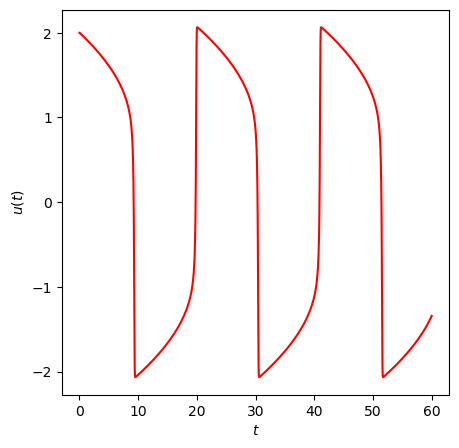

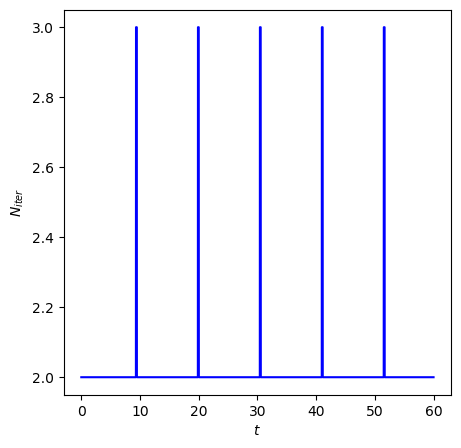

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [23]:
### id 4 x 4 matrix
I4 = Matrix(I, 4, 4)

### our original F iteration
function F(ki, h, ui)
   #= returns a 4x1 ki+1. =# 
    beta = [ui; ui]
    k1 = ki[1:2]
    k2 = ki[3:4]
    a = 1/4; b = ((1/4) - (sqrt(3)/6)); c = ((1/4) + (sqrt(3)/6)); d = a;
    return beta + h * [a * f(k1) + b * f(k2); c * f(k1) + d * f(k2)]
end

function J_f(k)
    #=Returns a 2x2 matrix representing the f Jacobian. k is a 2x1 vector. =#
    k1 = k[1]; k2 = k[2];
    #return [0 -(2/eps)*k1*k2-1; 1 (1/eps)*(1-k1^2)]
    return [0.0 1.0; -(2/eps)*k1*k2-1 (1/eps)*(1-k1^2)]
end

function J_F(ki, h)
   #= Return a 4x4 matrix representing our Jacobian of this iteration F at this k. 
    ki is a 4x1 vector ki = (k1(i), k2(i)). h is stepsize. =# 
    k1 = ki[1:2];
    k2 = ki[3:4];
    # coefficients
    a = 1/4; b = ((1/4) - (sqrt(3)/6)); c = ((1/4) + (sqrt(3)/6)); d = a;
    Jfk1 = J_f(k1); Jfk2 = J_f(k2); # each for 2x2
    JFki = zeros(4,4)
    JFki[1:2, 1:2] = a * Jfk1
    JFki[1:2, 3:4] = b * Jfk2
    JFki[3:4, 1:2] = c * Jfk1
    JFki[3:4, 3:4] = d * Jfk2
    return h*JFki
end

function newton_f(ki, h, ui)
    #= Represents one Newton iteration. Returns a 4 by 1 ki+1. h is the step size. ui is the solution at ti. =# 
    JFki = J_F(ki, h)
    beta = [ui; ui]
    return ki - inv(I4 - h*JFki)*(ki - beta - h*F(ki, h, ui))
end

function gl2Newton(N,T,u0,eps,maxIter)
    Niter = zeros(length(t)-1) # note Niter has length N-1 versus the solution has length N
    h = T/N
    u = zeros(2, length(t))
    u[:,1] = u0
    for i in 1:N
        k = [u[:,i];u[:,i]]; prev_k = [0.0;0.0;0.0;0.0]
        u_n = u[:,i]
        while norm(k - prev_k) >= 10^-6
            if Niter[i] >= maxIter
                Niter[i] = maxIter
                break
            else
                prev_k = k;
                k = newton_f(k, h, u_n)
                Niter[i] += 1
            end
        end
        u[:,i+1] = u_n + h * ( (1/2) * f(k[1:2]) + (1/2) * f(k[3:4]) )
    end
    return u,Niter
end

##############################
T = 60.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]
# GL 2-step Newton
ugl2Newton,Niter = gl2Newton(N,T,u0,eps,100)

using PyPlot
figure(1,figsize=(5,5))
plot(t,vec((ugl2Newton[1,:])),"r-")
xlabel(L"t")
ylabel(L"u(t)")


figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")


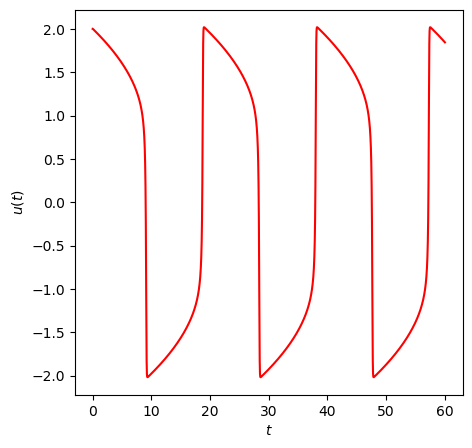

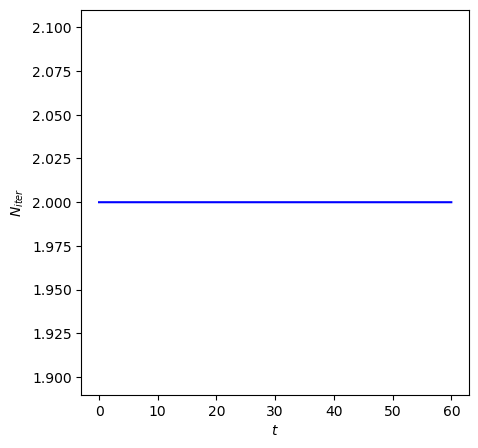

PyObject Text(26.39999999999999, 0.5, '$N_{iter}$')

In [26]:
## For h = 0.001
##############################
T = 60.0
dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]
# GL 2-step Newton
ugl2Newton,Niter = gl2Newton(N,T,u0,eps,100)

using PyPlot
figure(1,figsize=(5,5))
plot(t,vec((ugl2Newton[1,:])),"r-")
xlabel(L"t")
ylabel(L"u(t)")


figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")


**Which is significantly faster than functional iteration**